In [1]:
#library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

import pickle
import joblib

In [2]:
#read file

df = pd.read_csv('C:/Binus/Semester 4/Machine Learning/AoL/dataset/recruitment_data.csv')

Explore Data

In [3]:
#show head data
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [4]:
#find missing value
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

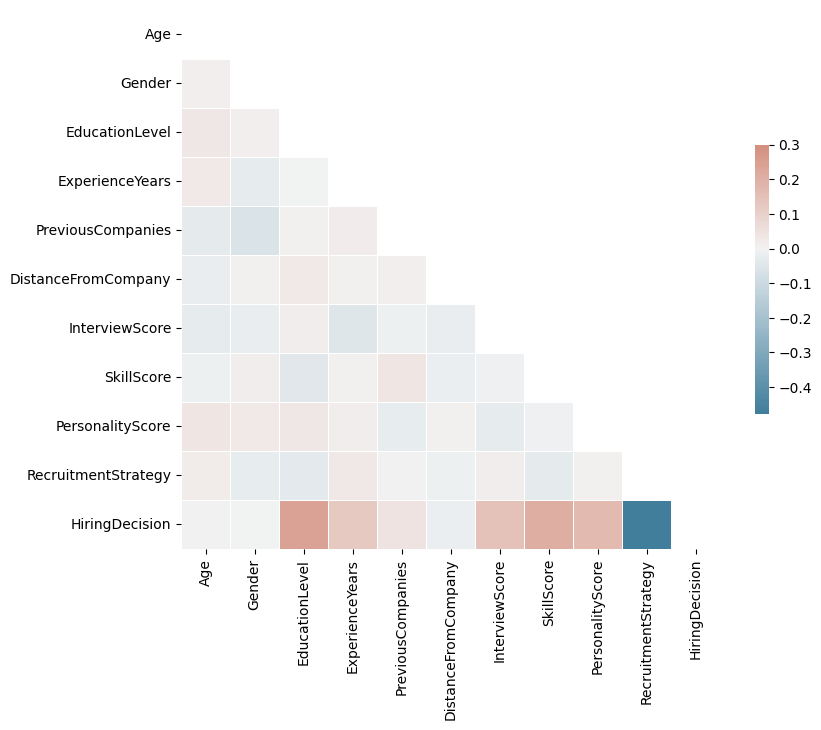

In [5]:
# show correlation
corr = df.corr()

#mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(9, 7))

#custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [6]:
temp_df = df

In [7]:
temp_df = temp_df.drop(["Age", "Gender", "DistanceFromCompany"], axis = 1)
temp_df.head()

,EducationLevel,ExperienceYears,PreviousCompanies,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,2,0,3,48,78,91,1,1
1,4,12,3,35,68,80,2,1
2,2,3,2,20,67,13,2,0
3,2,5,2,36,27,70,3,0
4,1,6,1,23,52,85,2,0


In [8]:
x = df.drop("HiringDecision",axis = 1)
y = df["HiringDecision"]
x.shape, y.shape

((1500, 10), (1500,))

Splitting data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= .75)

Scaling data

In [10]:
x_train = x_train / 255
x_test = x_test / 255

Modelling 

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [12]:
#store performance model
model_performance = {}

In [13]:
#apply model
for model_name, model in models.items():
    print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    model_performance[model_name] = (accuracy, f1)
    print("\033[1m**Accuracy**:\033[0m\n", accuracy)
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))


Classification with Logistic Regression:
------------------------------
**Accuracy**:
 0.7226666666666667

**Confusion Matrix**:
 [[259   4]
 [100  12]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       263
           1       0.75      0.11      0.19       112

    accuracy                           0.72       375
   macro avg       0.74      0.55      0.51       375
weighted avg       0.73      0.72      0.64       375


Classification with K-Nearest Neighbors:
------------------------------
**Accuracy**:
 0.6826666666666666

**Confusion Matrix**:
 [[217  46]
 [ 73  39]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.75      0.83      0.78       263
           1       0.46      0.35      0.40       112

    accuracy                           0.68       375
   macro avg       0.60      0.59      0.59       375
weighted avg       0.66      0.68  

In [14]:
top_models = sorted(model_performance.items(), key=lambda x: x[1][1], reverse=True)[:1]

In [15]:
print("\n\033[1mTop Model based on F1 Score:\033[0m\n", top_models)


Top Model based on F1 Score:
 [('Random Forest', (0.9253333333333333, 0.9233064915286502))]


TEMPORARY

In [16]:
x_tmp = temp_df.drop("HiringDecision",axis = 1)
y_tmp = temp_df["HiringDecision"]
x_tmp.shape, y_tmp.shape

((1500, 7), (1500,))

In [17]:
tmp_x_train, tmp_x_test, tmp_y_train, tmp_y_test = train_test_split(x_tmp, y_tmp, train_size= .75)

In [18]:
tmp_x_train = tmp_x_train / 255
tmp_x_test = tmp_x_test / 255

In [19]:
tmp_model_performance = {}

In [20]:
#apply model
for model_name, model in models.items():
    print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")
    model.fit(tmp_x_train, tmp_y_train)
    tmp_y_pred = model.predict(tmp_x_test)
    tmp_accuracy = accuracy_score(tmp_y_test, tmp_y_pred)
    tmp_f1 = f1_score(tmp_y_test, tmp_y_pred, average='weighted')
    tmp_model_performance[model_name] = (tmp_accuracy, tmp_f1)
    print("\033[1m**Accuracy**:\033[0m\n", tmp_accuracy)
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(tmp_y_test, tmp_y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(tmp_y_test, tmp_y_pred))


Classification with Logistic Regression:
------------------------------
**Accuracy**:
 0.7466666666666667

**Confusion Matrix**:
 [[266   3]
 [ 92  14]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       269
           1       0.82      0.13      0.23       106

    accuracy                           0.75       375
   macro avg       0.78      0.56      0.54       375
weighted avg       0.77      0.75      0.67       375


Classification with K-Nearest Neighbors:
------------------------------
**Accuracy**:
 0.7066666666666667

**Confusion Matrix**:
 [[224  45]
 [ 65  41]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       269
           1       0.48      0.39      0.43       106

    accuracy                           0.71       375
   macro avg       0.63      0.61      0.61       375
weighted avg       0.69      0.71  

In [21]:
tmp_top_models = sorted(tmp_model_performance.items(), key=lambda x: x[1][1], reverse=True)[:1]

In [22]:
print("\n\033[1mTop Model based on F1 Score:\033[0m\n", tmp_top_models)


Top Model based on F1 Score:
 [('Random Forest', (0.96, 0.9593062012342658))]


In [23]:
forest = RandomForestClassifier()
forest.fit(tmp_x_train, tmp_y_train)
prediction = forest.predict(tmp_x_test)

print("Random Forest")
print(f'Accuracy: {accuracy_score(tmp_y_test, prediction)}')
print(confusion_matrix(tmp_y_test, prediction))
print(classification_report(tmp_y_test, prediction))

Random Forest
Accuracy: 0.9546666666666667
[[265   4]
 [ 13  93]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       269
           1       0.96      0.88      0.92       106

    accuracy                           0.95       375
   macro avg       0.96      0.93      0.94       375
weighted avg       0.95      0.95      0.95       375



In [24]:
tmp_x_test

,EducationLevel,ExperienceYears,PreviousCompanies,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
1078,0.003922,0.031373,0.019608,0.070588,0.200000,0.098039,0.007843
844,0.003922,0.050980,0.011765,0.074510,0.070588,0.003922,0.007843
351,0.007843,0.019608,0.011765,0.000000,0.086275,0.054902,0.007843
1007,0.003922,0.027451,0.003922,0.113725,0.356863,0.282353,0.011765
1371,0.007843,0.031373,0.003922,0.011765,0.023529,0.074510,0.003922
...,...,...,...,...,...,...,...
1020,0.007843,0.043137,0.015686,0.086275,0.200000,0.270588,0.007843
1287,0.015686,0.031373,0.007843,0.180392,0.305882,0.313725,0.011765
102,0.007843,0.031373,0.007843,0.301961,0.337255,0.039216,0.007843
798,0.011765,0.035294,0.011765,0.254902,0.337255,0.066667,0.011765
